In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as r
import scipy.stats as S
rawdata = pd.read_csv("datasets/train.csv")



print(rawdata.shape)

(42000, 785)


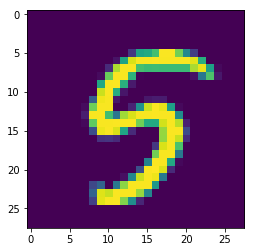

In [5]:
image=np.array(rawdata)[8,1:]
print
image=image.reshape(28,28)
plt.imshow(image)

In [7]:
from sklearn.preprocessing import StandardScaler
standardscalar_x=StandardScaler()


In [ ]:
rawdata.iloc[:,1:]=standardscalar_x.fit_transform(rawdata.iloc[:,1:])

In [ ]:
image=np.array(rawdata)[8,1:]
image=image.reshape(28,28)
plt.imshow(image)

In [9]:
digitwisedata=list(map(lambda digit:  rawdata[rawdata['label']==digit].iloc[:,1:]  , [0,1,2,3,4,5,6,7,8,9]  ))
pcap_digitwise = list(map(lambda digit: digitwisedata[digit].shape[0] /rawdata.shape[0] ,[0,1,2,3,4,5,6,7,8,9] ))


In [10]:
digitwisedataArray=list(map(lambda digit: np.array(digitwisedata[digit]),  [0,1,2,3,4,5,6,7,8,9]   ))

#zeromeans=np.mean(digitwisedata[0],axis=0).reshape(1,785)
#zeromeans.shape
means= list(map(lambda  digit :  np.mean(digitwisedataArray[digit],axis=0).reshape(1,784)  ,  [0,1,2,3,4,5,6,7,8,9]  ))

print(means[4].shape)
print(digitwisedata[4].shape)

#zero_mean_data0 = digitwisedata[0] - means[0]

#zero_mean_data0.shape


zero_mean_digitwise_dataArray= list(map(lambda digit: digitwisedataArray[digit] - means[digit] ,[0,1,2,3,4,5,6,7,8,9] ))
zero_mean_digitwise_dataArray[4].shape

image=zero_mean_digitwise_data[8][0,:].reshape(28,28)
# reshaped in 28X28  bcoz  28*28 =784               `````````````
#image=np.array((digitwisedata[0])[1,:])
image=image.reshape(28,28)
plt.imshow(image)

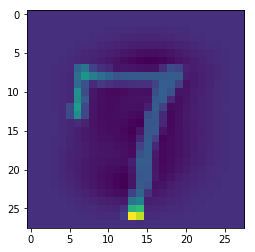

In [12]:
# appply dimensionality reduction 

image=digitwisedataArray[7][0,:].reshape(28,28)
# reshaped in 28X28  bcoz  28*28 =784               `````````````
#image=np.array((digitwisedata[0])[1,:])
image=image.reshape(28,28)
plt.imshow(image)



 #cov in  numpy has one more parameter whih ha defaut value as 1 due to which wrong result is obtainedzeroimagescov.shape


In [14]:
covs=list(map(lambda digit:np.cov(digitwisedataArray[digit],rowvar=0),[0,1,2,3,4,5,6,7,8,9] ))

In [15]:
covs[0].shape

(784, 784)

In [16]:
digitwise_factorisedMatrixes=list(map(lambda digit: np.linalg.svd(covs[digit]), [0,1,2,3,4,5,6,7,8,9] ))

In [17]:
digitwise_factorisedMatrixes[0]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]),
 array([9.37681433e+01, 6.44425739e+01, 3.10527300e+01, 2.55247635e+01,
        2.27031468e+01, 2.03583173e+01, 1.79559975e+01, 1.66861957e+01,
        1.35147291e+01, 1.23056988e+01, 1.14280638e+01, 1.07245974e+01,
        1.01476478e+01, 8.92177232e+00, 7.87406170e+00, 7.57657947e+00,
        7.00688180e+00, 6.94835323e+00, 6.51000949e+00, 6.11293590e+00,
        5.47655088e+00, 5.01164114e+00, 4.82862251e+00, 4.70910401e+00,
        4.45155141e+00, 4.26267547e+00, 4.21811693e+00, 3.80569505e+00,
        3.71000350e+00, 3.49079220e+00, 3.35981852e+00, 3.13525543e+00,
        3.04913808e+00, 2.75471089e+00, 2.71791629e+00, 2.54742876e+00,
        2.49374201e+00, 2.38866869e+00, 2.25710829e+00, 2.23306594e+00,
        2.16774393e+00, 1.99993

In [21]:
#indexes[0]= np.argmax(digitwise_factorisedMatrixes[0][0],axis=1)

In [18]:
indexes=list(map(lambda digit:  np.argmax(digitwise_factorisedMatrixes[digit][0],axis=1), [0,1,2,3,4,5,6,7,8,9]))

In [19]:
totalVariances=list(map(lambda digit: np.sum(digitwise_factorisedMatrixes[digit][1]) , [0,1,2,3,4,5,6,7,8,9]))
preservedVariances=list(map(lambda digit: .95 * totalVariances[digit], [0,1,2,3,4,5,6,7,8,9] ))

In [20]:
totalVariances

[576.9993631788902,
 213.64056162691145,
 988.369875943917,
 685.0080560227874,
 429.23664327245183,
 633.7145580434305,
 880.4294285160609,
 898.0902785671525,
 452.42340010276115,
 516.8517461550219]

In [21]:
digitwise_eigenpairs=list(map(lambda digit:dict(zip(digitwise_factorisedMatrixes[digit][1], indexes[digit])), [0,1,2,3,4,5,6,7,8,9] ))


In [22]:
def PCA(digit): 
    
    varsum=0
    k=0
    for key in digitwise_eigenpairs[digit]:
    
        varsum+=key
        if varsum>=preservedVariances[digit]:
            print(digitwise_eigenpairs[digit][key])
            k=np.where(indexes[digit]==digitwise_eigenpairs[digit][key])
            return k[0][0]
    

        
        
        

548.1493950199457

In [36]:
x=PCA(0)
print(x)


349
136


In [39]:
df=pd.DataFrame()
for i in range(x+1):
    print(indexes[0][i])
    df[indexes[0][i]]= digitwisedataArray[0][i]

539
538
537
536
535
534
533
532
543
542
541
540
576
545
526
531
529
528
545
782
559
531
556
548
550
559
548
554
560
526
549
565
581
558
547
581
571
573
562
599
568
550
564
587
86
607
566
572
577
593
625
573
591
595
576
577
591
589
588
527
562
586
184
115
617
576
584
613
602
453
552
589
595
594
583
608
619
585
597
594
603
592
564
621
614
604
610
782
29
782
530
599
443
400
446
481
96
481
149
446
459
392
129
91
446
93
93
93
461
57
601
614
613
610
620
178
113
228
129
129
464
81
126
376
200
35
35
264
80
8
264
27
27
95
40
419
349


In [40]:
df.shape

(784, 104)

In [29]:
indexes[0]

array([539, 538, 537, 536, 535, 534, 533, 532, 543, 542, 541, 540, 576,
       545, 526, 531, 529, 528, 545, 782, 559, 531, 556, 548, 550, 559,
       548, 554, 560, 526, 549, 565, 581, 558, 547, 581, 571, 573, 562,
       599, 568, 550, 564, 587,  86, 607, 566, 572, 577, 593, 625, 573,
       591, 595, 576, 577, 591, 589, 588, 527, 562, 586, 184, 115, 617,
       576, 584, 613, 602, 453, 552, 589, 595, 594, 583, 608, 619, 585,
       597, 594, 603, 592, 564, 621, 614, 604, 610, 782,  29, 782, 530,
       599, 443, 400, 446, 481,  96, 481, 149, 446, 459, 392, 129,  91,
       446,  93,  93,  93, 461,  57, 601, 614, 613, 610, 620, 178, 113,
       228, 129, 129, 464,  81, 126, 376, 200,  35,  35, 264,  80,   8,
       264,  27,  27,  95,  40, 419, 349, 517, 615, 638, 635, 606, 670,
       115, 470, 441, 475, 456, 475, 408,  41, 182, 333, 249, 375, 203,
       121,   8,   8, 153,  19,  19,  40, 279, 480, 504, 638, 658, 628,
       629, 644, 644, 491, 495, 491, 464, 391, 354,  60, 192, 25

#principal component analysis, i.e., PCA is a technique used for DIMENSIONALITY REDUCTION

DIMENSIONALITY REDUCTION is a LOSSY data compression

SVD = decomposition of covariance matrix, cov using Singular Value Decomposition
using SVD , cov = Q * eigenVAlueMatrix * transposeOf(Q)

Algo for PCA:

    1. iterarte over all eigen values
    2. calculate sum of all eigen values and then divide all eigen values by sum
    3. if ( loop over sum ) / total actual variance sum <=  (required variance to be achieved, eg., .98): continue
     4. else: break;
     5.drop rest of the columns
     6. apply naive bayse
            

In [25]:
d=pd.DataFrame()

In [26]:
d

""


In [27]:
d['fgn']=[1,2,5,78,7]

In [28]:
d

,fgn
0,1
1,2
2,5
3,78
4,7


In [2]:
data = pd.read_csv("datasets/test.csv")


In [4]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
